# Week 1: Multiple Output Models using the Keras Functional API

Welcome to the first programming assignment of the course! Your task will be to use the Keras functional API to train a model to predict two outputs. For this lab, you will use the **[Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)** from the **UCI machine learning repository**. It has separate datasets for red wine and white wine.

Normally, the wines are classified into one of the quality ratings specified in the attributes. In this exercise, you will combine the two datasets to predict the wine quality and whether the wine is red or white solely from the attributes. 

You will model wine quality estimations as a regression problem and wine type detection as a binary classification problem.


## Imports

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools
from tensorflow.keras.utils import plot_model

#import utils

## Load Dataset


You will now load the dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) which are **already saved** in your workspace (*Note: For successful grading, please **do not** modify the default string set to the `URI` variable below*).

### Pre-process the white wine dataset
You will add a new column named `is_red` in your dataframe to indicate if the wine is white or red. 
- In the white wine dataset, you will fill the column `is_red` with  zeros (0).

In [2]:
# # URL of the white wine dataset
PATH_DATA= 'data/wine_quality/'
URI = PATH_DATA + 'winequality-white.csv'

# # load the dataset from the URL
white_df = pd.read_csv(URI, sep=";")

# # fill the `is_red` column with zeros.
white_df["is_red"] = 0

# # keep only the first of duplicate items
white_df = white_df.drop_duplicates(keep='first')
white_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [3]:
# You can click `File -> Open` in the menu above and open the `utils.py` file 
# in case you want to inspect the unit tests being used for each graded function.

#utils.test_white_df(white_df)

In [4]:
# You can click `File -> Open` in the menu above and open the `utils.py` file 
# in case you want to inspect the unit tests being used for each graded function.

utils.test_white_df(white_df)


NameError: name 'utils' is not defined

In [5]:
print(white_df.alcohol[0])
print(white_df.alcohol[100])

# EXPECTED OUTPUT
# 8.8
# 9.1

8.8
9.1


### Pre-process the red wine dataset
- In the red wine dataset, you will fill in the column `is_red` with ones (1).

In [6]:
# # URL of the red wine dataset
URI = PATH_DATA + 'winequality-red.csv'

# # load the dataset from the URL
red_df = pd.read_csv(URI, sep=";")

# # fill the `is_red` column with ones.
red_df["is_red"] = 1

# # keep only the first of duplicate items
red_df = red_df.drop_duplicates(keep='first')
red_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [7]:
utils.test_red_df(red_df)


NameError: name 'utils' is not defined

In [8]:
print(red_df.alcohol[0])
print(red_df.alcohol[100])

# EXPECTED OUTPUT
# 9.4
# 10.2

9.4
10.2


### Concatenate the datasets

Next, concatenate the red and white wine dataframes.

In [9]:
df = pd.concat([red_df, white_df], ignore_index=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [10]:
print(df.alcohol[0])
print(df.alcohol[100])

# EXPECTED OUTPUT
# 9.4
# 9.5

9.4
9.5


In a real-world scenario, you should shuffle the data. For this assignment however, **you are not** going to do that because the grader needs to test with deterministic data. If you want the code to do it **after** you've gotten your grade for this notebook, we left the commented line below for reference

In [11]:
#df = df.iloc[np.random.permutation(len(df))]

This will chart the quality of the wines.

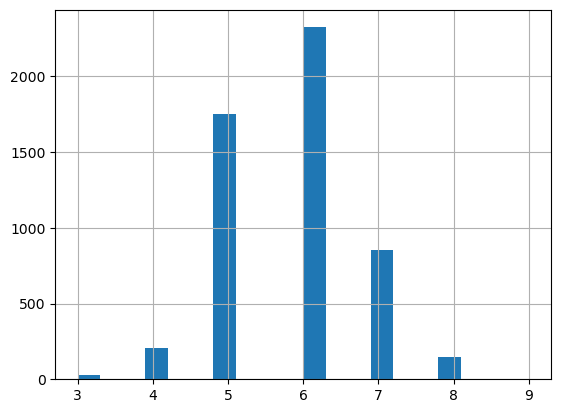

In [12]:
df['quality'].hist(bins=20);

### Imbalanced data
You can see from the plot above that the wine quality dataset is imbalanced. 
- Since there are very few observations with quality equal to 3, 4, 8 and 9, you can drop these observations from your dataset. 
- You can do this by removing data belonging to all classes except those > 4 and < 8.

In [13]:
df['quality'] > 4 & (df['quality'] < 8 )

0       True
1       True
2       True
3       True
4       True
        ... 
5315    True
5316    True
5317    True
5318    True
5319    True
Name: quality, Length: 5320, dtype: bool

In [14]:
# # get data with wine quality greater than 4 and less than 8
df = df[(df['quality'] > 4) & (df['quality'] < 8 )]

# # reset index and drop the old one
df = df.reset_index(drop=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4926,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4927,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4928,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4929,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [15]:
utils.test_df_drop(df)



NameError: name 'utils' is not defined

In [16]:
print(df.alcohol[0])
print(df.alcohol[100])

# EXPECTED OUTPUT
# 9.4
# 10.9

9.4
10.9


You can plot again to see the new range of data and quality

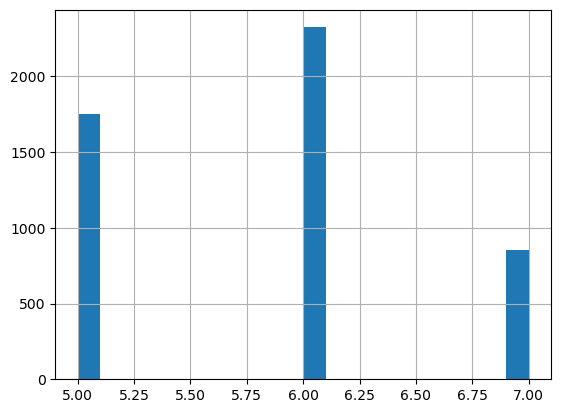

In [17]:
df['quality'].hist(bins=20);

### Train Test Split 

Next, you can split the datasets into training, test and validation datasets.
- The data frame should be split 80:20 into `train` and `test` sets.
- The resulting `train` should then be split 80:20 into `train` and `val` sets.
- The `train_test_split` parameter `test_size` takes a float value that ranges between 0. and 1, and represents the proportion of the dataset that is allocated to the test set.  The rest of the data is allocated to the training set.

In [18]:
## Please do not change the random_state parameter. This is needed for grading.

# # split df into 80:20 train and test sets
train, test = train_test_split(df, test_size=0.2, random_state = 1)
                               
# # split train into 80:20 train and val sets
train, val = train_test_split(train, test_size=0.2, random_state = 1)

In [19]:
df.size, test.size, val.size

(64103, 12831, 10257)

In [20]:
utils.test_data_sizes(train.size, test.size, val.size)



NameError: name 'utils' is not defined

Here's where you can explore the training stats. You can pop the labels 'is_red' and 'quality' from the data as these will be used as the labels


In [21]:
train_stats = train.describe()
train_stats

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
count,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000
mean,7.221616,0.338929,0.321569,5.155911,0.056976,30.388590,115.062282,0.994633,3.223201,0.534051,10.504466,5.813629,0.255784
std,1.325297,0.162476,0.147970,4.639632,0.036802,17.236784,56.706617,0.003005,0.161272,0.149149,1.154654,0.701121,0.436370
min,3.800000,0.080000,0.000000,0.600000,0.012000,1.000000,6.000000,0.987110,2.720000,0.220000,8.500000,5.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,75.000000,0.992320,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,2.800000,0.047000,28.000000,117.000000,0.994810,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.400000,7.650000,0.066000,41.000000,156.000000,0.996800,3.330000,0.600000,11.300000,6.000000,1.000000
max,15.600000,1.240000,1.660000,65.800000,0.611000,131.000000,344.000000,1.038980,4.010000,1.950000,14.000000,7.000000,1.000000


In [22]:
train_stats = train.describe()
train_stats.pop('is_red') #remove the output atts
train_stats.pop('quality')
train_stats = train_stats.transpose() #just to visulize better

Explore the training stats!

In [23]:
train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3155.0,7.221616,1.325297,3.80000,6.40000,7.00000,7.7000,15.60000
volatile acidity,3155.0,0.338929,0.162476,0.08000,0.23000,0.29000,0.4000,1.24000
citric acid,3155.0,0.321569,0.147970,0.00000,0.25000,0.31000,0.4000,1.66000
residual sugar,3155.0,5.155911,4.639632,0.60000,1.80000,2.80000,7.6500,65.80000
chlorides,3155.0,0.056976,0.036802,0.01200,0.03800,0.04700,0.0660,0.61100
free sulfur dioxide,3155.0,30.388590,17.236784,1.00000,17.00000,28.00000,41.0000,131.00000
total sulfur dioxide,3155.0,115.062282,56.706617,6.00000,75.00000,117.00000,156.0000,344.00000
density,3155.0,0.994633,0.003005,0.98711,0.99232,0.99481,0.9968,1.03898
pH,3155.0,3.223201,0.161272,2.72000,3.11000,3.21000,3.3300,4.01000
sulphates,3155.0,0.534051,0.149149,0.22000,0.43000,0.51000,0.6000,1.95000


### Get the labels

The features and labels are currently in the same dataframe.
- You will want to store the label columns `is_red` and `quality` separately from the feature columns.  
- The following function, `format_output`, gets these two columns from the dataframe (it's given to you).
- `format_output` also formats the data into numpy arrays. 
- Please use the `format_output` and apply it to the `train`, `val` and `test` sets to get dataframes for the labels.

In [24]:
def format_output(data):
    
    is_red = data.pop('is_red') #the pop function returns the removed column 
    is_red = np.array(is_red) #so, we get it and put it in an np array
    quality = data.pop('quality') #the pop function returns the removed column 
    quality = np.array(quality)
    
    return (quality, is_red)

In [25]:
# # format the output of the train set
train_Y = format_output(train)

# # format the output of the val set
val_Y = format_output(val)
    
# # format the output of the test set
test_Y = format_output(test)

In [26]:
utils.test_format_output(df, train_Y, val_Y, test_Y)

NameError: name 'utils' is not defined

Notice that after you get the labels, the `train`, `val` and `test` dataframes no longer contain the label columns, and contain just the feature columns.
- This is because you used `.pop` in the `format_output` function.

In [27]:
train.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
225,7.5,0.65,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,9.4
3557,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8
3825,8.8,0.27,0.25,5.0,0.024,52.0,99.0,0.99250,2.87,0.49,11.4


### Normalize the data

Next, you can normalize the data, x, using the formula:
$$x_{norm} = \frac{x - \mu}{\sigma}$$
- The `norm` function is defined for you.
- Please apply the `norm` function to normalize the dataframes that contains the feature columns of `train`, `val` and `test` sets.

In [28]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [29]:
# # normalize the train set
norm_train_X = norm(train)
    
# # normalize the val set
norm_val_X = norm(val)
    
# # normalize the test set
norm_test_X = norm(test)

In [30]:
norm_train_X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,3.155000e+03,3.155000e+03,3.155000e+03,3.155000e+03,3.155000e+03,3.155000e+03,3.155000e+03,3.155000e+03,3.155000e+03,3.155000e+03,3.155000e+03
mean,1.010078e-14,-8.421156e-16,-1.175640e-15,-1.109027e-15,-5.379039e-16,-4.363476e-17,-8.818443e-17,1.379135e-12,-5.344290e-15,3.241394e-15,-9.643932e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.581773e+00,-1.593640e+00,-2.173205e+00,-9.819553e-01,-1.222099e+00,-1.704993e+00,-1.923273e+00,-2.503354e+00,-3.120207e+00,-2.105612e+00,-1.735988e+00
25%,-6.199488e-01,-6.704283e-01,-4.836722e-01,-7.233141e-01,-5.156193e-01,-7.767452e-01,-7.064834e-01,-7.696057e-01,-7.019286e-01,-6.976275e-01,-8.699280e-01
50%,-1.672202e-01,-3.011436e-01,-7.818439e-02,-5.077797e-01,-2.710685e-01,-1.385751e-01,3.417093e-02,5.899947e-02,-8.185728e-02,-1.612525e-01,-1.770798e-01
75%,3.609632e-01,3.758784e-01,5.300473e-01,5.375617e-01,2.452053e-01,6.156259e-01,7.219214e-01,7.212180e-01,6.622283e-01,4.421693e-01,6.889804e-01
max,6.321890e+00,5.545864e+00,9.045292e+00,1.307088e+01,1.505411e+01,5.837018e+00,4.037231e+00,1.475759e+01,4.878713e+00,9.493497e+00,3.027343e+00


In [31]:
utils.test_norm(norm_train_X, norm_val_X, norm_test_X, train, val, test)


NameError: name 'utils' is not defined

## Define the Model

Define the model using the functional API. The base model will be 2 `Dense` layers of 128 neurons each, and have the `'relu'` activation.
- Check out the documentation for [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)

In [32]:
def base_model(inputs):
    
    # connect a Dense layer with 128 neurons and a relu activation
    # connect another Dense layer with 128 neurons and a relu activation

    x = tf.keras.layers.Dense(units=128, activation='relu', name="base_dense_1")(inputs)
    x = tf.keras.layers.Dense(units=128, activation='relu', name="base_dense_2")(x)    

    return x

In [33]:
utils.test_base_model(base_model)

NameError: name 'utils' is not defined

# Define output layers of the model

You will add output layers to the base model. 
- The model will need two outputs.

One output layer will predict wine quality, which is a numeric value.
- Define a `Dense` layer with 1 neuron.
- Since this is a regression output, the activation can be left as its default value `None`.

The other output layer will predict the wine type, which is either red `1` or not red `0` (white).
- Define a `Dense` layer with 1 neuron.
- Since there are two possible categories, you can use a sigmoid activation for binary classification.

Define the `Model`
- Define the `Model` object, and set the following parameters:
  - `inputs`: pass in the inputs to the model as a list.
  - `outputs`: pass in a list of the outputs that you just defined: wine quality, then wine type.
  - **Note**: please list the wine quality before wine type in the outputs, as this will affect the calculated loss if you choose the other order. **(WHY?)**

In [34]:
def final_model(inputs):
    
    # get the base model
    x = base_model(inputs)

    # connect the output Dense layer for regression: the wine_quality regression output
    wine_quality = Dense(units='1', name='wine_quality')(x)

    # connect the output Dense layer for classification. this will use a sigmoid activation.
    # second output: wine_type for classification
    wine_type = Dense(units='1', activation='sigmoid', name='wine_type')(x)

    # define the model using the input and output layers
    model = Model(inputs=inputs, outputs=[wine_quality, wine_type])

    return model

In [35]:
utils.test_final_model(final_model)

NameError: name 'utils' is not defined

## Compiling the Model

Next, compile the model. When setting the loss parameter of `model.compile`, you're setting the loss for each of the two outputs (wine quality and wine type).

To set more than one loss, use a dictionary of key-value pairs.
- You can look at the docs for the losses [here](https://www.tensorflow.org/api_docs/python/tf/keras/losses#functions).
    - **Note**: For the desired spelling, please look at the "Functions" section of the documentation and not the "classes" section on that same page.
- wine_type: Since you will be performing binary classification on wine type, you should use the binary crossentropy loss function for it.  Please pass this in as a string.  
  - **Hint**, this should be all lowercase.  In the documentation, you'll see this under the "Functions" section, not the "Classes" section.
- wine_quality: since this is a regression output, use the mean squared error.  Please pass it in as a string, all lowercase.
  - **Hint**: You may notice that there are two aliases for mean squared error.  Please use the shorter name.


You will also set the metric for each of the two outputs.  Again, to set metrics for two or more outputs, use a dictionary with key value pairs.
- The metrics documentation is linked [here](https://www.tensorflow.org/api_docs/python/tf/keras/metrics).
- For the wine type, please set it to accuracy as a string, all lowercase.
- For wine quality, please use the root mean squared error.  Instead of a string, you'll set it to an instance of the class [RootMeanSquaredError](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/RootMeanSquaredError), which belongs to the tf.keras.metrics module.

**Note**: If you see the error message 
>Exception: wine quality loss function is incorrect.

- Please also check your other losses and metrics, as the error may be caused by the other three key-value pairs and not the wine quality loss.

In [36]:
inputs = tf.keras.layers.Input(shape=(11,))
rms = tf.keras.optimizers.RMSprop(lr=0.0001)
model = final_model(inputs)


C:\Users\allan.freitas\Anaconda3\envs\allan-cv\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


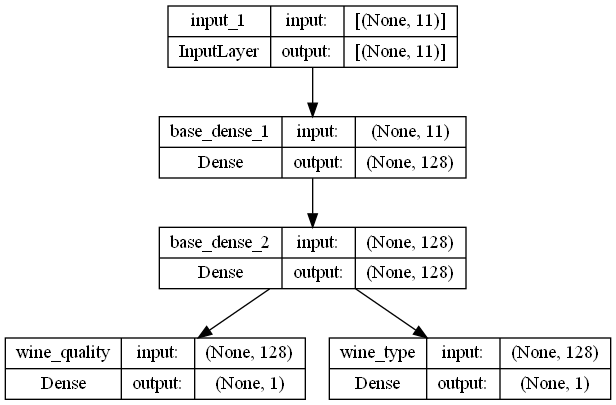

In [37]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [38]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 11)]         0           []                               
                                                                                                  
 base_dense_1 (Dense)           (None, 128)          1536        ['input_1[0][0]']                
                                                                                                  
 base_dense_2 (Dense)           (None, 128)          16512       ['base_dense_1[0][0]']           
                                                                                                  
 wine_quality (Dense)           (None, 1)            129         ['base_dense_2[0][0]']           
                                                                                              

In [39]:
loss_dict = {
    'wine_type' : 'binary_crossentropy',
    'wine_quality' : 'mse'
}

metrics_dict = {
    'wine_type' : 'accuracy',
    'wine_quality': tf.keras.metrics.RootMeanSquaredError()
}

model.compile(optimizer=rms, 
               loss = loss_dict,
               metrics = metrics_dict
)

In [ ]:
utils.test_model_compile(model)

## Training the Model
Fit the model to the training inputs and outputs. 
- Check the documentation for [model.fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit).
- Remember to use the normalized training set as inputs. 
- For the validation data, please use the normalized validation set.

**Important: Please do not increase the number of epochs below. This is to avoid the grader from timing out. You can increase it once you have submitted your work.**

In [40]:
history = model.fit(x=norm_train_X, y=train_Y,
    epochs = 40, validation_data=(norm_val_X, val_Y))

Epoch 1/40
99/99 [==============================] - 2s 7ms/step - loss: 27.5237 - wine_quality_loss: 26.8199 - wine_type_loss: 0.7039 - wine_quality_root_mean_squared_error: 5.1788 - wine_type_accuracy: 0.3645 - val_loss: 19.2369 - val_wine_quality_loss: 18.5253 - val_wine_type_loss: 0.7116 - val_wine_quality_root_mean_squared_error: 4.3041 - val_wine_type_accuracy: 0.3498
Epoch 2/40
99/99 [==============================] - 0s 3ms/step - loss: 12.9681 - wine_quality_loss: 12.2561 - wine_type_loss: 0.7120 - wine_quality_root_mean_squared_error: 3.5009 - wine_type_accuracy: 0.3407 - val_loss: 7.6949 - val_wine_quality_loss: 7.0071 - val_wine_type_loss: 0.6878 - val_wine_quality_root_mean_squared_error: 2.6471 - val_wine_type_accuracy: 0.3828
Epoch 3/40
99/99 [==============================] - 0s 3ms/step - loss: 5.1246 - wine_quality_loss: 4.4851 - wine_type_loss: 0.6395 - wine_quality_root_mean_squared_error: 2.1178 - wine_type_accuracy: 0.5718 - val_loss: 3.2400 - val_wine_quality_loss

Epoch 23/40
99/99 [==============================] - 0s 2ms/step - loss: 0.6086 - wine_quality_loss: 0.5687 - wine_type_loss: 0.0398 - wine_quality_root_mean_squared_error: 0.7541 - wine_type_accuracy: 0.9918 - val_loss: 0.5902 - val_wine_quality_loss: 0.5492 - val_wine_type_loss: 0.0410 - val_wine_quality_root_mean_squared_error: 0.7411 - val_wine_type_accuracy: 0.9911
Epoch 24/40
99/99 [==============================] - 0s 2ms/step - loss: 0.5845 - wine_quality_loss: 0.5456 - wine_type_loss: 0.0389 - wine_quality_root_mean_squared_error: 0.7387 - wine_type_accuracy: 0.9921 - val_loss: 0.5637 - val_wine_quality_loss: 0.5237 - val_wine_type_loss: 0.0400 - val_wine_quality_root_mean_squared_error: 0.7237 - val_wine_type_accuracy: 0.9924
Epoch 25/40
99/99 [==============================] - 0s 2ms/step - loss: 0.5581 - wine_quality_loss: 0.5200 - wine_type_loss: 0.0381 - wine_quality_root_mean_squared_error: 0.7211 - wine_type_accuracy: 0.9921 - val_loss: 0.5404 - val_wine_quality_loss: 0

In [41]:
history

In [42]:
utils.test_history(history)

NameError: name 'utils' is not defined

In [43]:
# Gather the training metrics
loss, wine_quality_loss, wine_type_loss, wine_quality_rmse, wine_type_accuracy = model.evaluate(x=norm_val_X, y=val_Y)

print()
print(f'loss: {loss}')
print(f'wine_quality_loss: {wine_quality_loss}')
print(f'wine_type_loss: {wine_type_loss}')
print(f'wine_quality_rmse: {wine_quality_rmse}')
print(f'wine_type_accuracy: {wine_type_accuracy}')

# EXPECTED VALUES
# ~ 0.30 - 0.38
# ~ 0.30 - 0.38
# ~ 0.018 - 0.036
# ~ 0.50 - 0.62
# ~ 0.97 - 1.0

# Example:
#0.3657050132751465
#0.3463745415210724
#0.019330406561493874
#0.5885359048843384
#0.9974651336669922

25/25 [==============================] - 0s 2ms/step - loss: 0.3932 - wine_quality_loss: 0.3595 - wine_type_loss: 0.0336 - wine_quality_root_mean_squared_error: 0.5996 - wine_type_accuracy: 0.9949

loss: 0.3931805193424225
wine_quality_loss: 0.3595430254936218
wine_type_loss: 0.03363741561770439
wine_quality_rmse: 0.5996190905570984
wine_type_accuracy: 0.9949302673339844


## Analyze the Model Performance

Note that the model has two outputs. The output at index 0 is quality and index 1 is wine type

So, round the quality predictions to the nearest integer.

In [44]:
predictions = model.predict(norm_test_X)
quality_pred = predictions[0]
type_pred = predictions[1]

31/31 [==============================] - 0s 2ms/step


In [45]:
print(quality_pred[0])

# EXPECTED OUTPUT
# 5.4 - 6.0

[5.678712]


In [47]:
print(type_pred[0])
print(type_pred[944])

# EXPECTED OUTPUT
# A number close to zero
# A number close to or equal to 1

[0.00182373]
[0.9999414]


### Plot Utilities

We define a few utilities to visualize the model performance.

In [48]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)

In [49]:
def plot_confusion_matrix(y_true, y_pred, title='', labels=[0,1]):
    cm = confusion_matrix(test_Y[1], np.round(type_pred), labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=[0, 1])
    disp.plot(values_format='d');

In [50]:
def plot_diff(y_true, y_pred, title = '' ):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.plot([-100, 100], [-100, 100])
    return plt

### Plots for Metrics

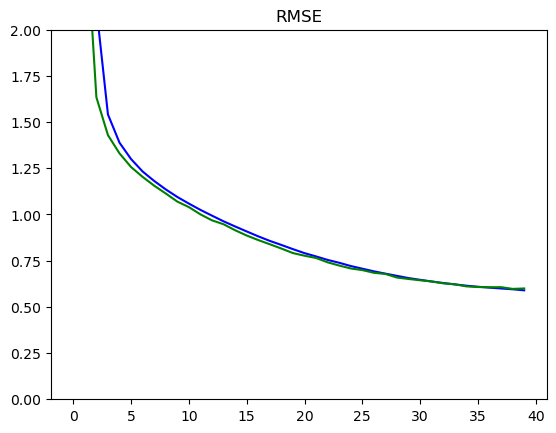

In [51]:
plot_metrics('wine_quality_root_mean_squared_error', 'RMSE', ylim=2)
#validation results in green

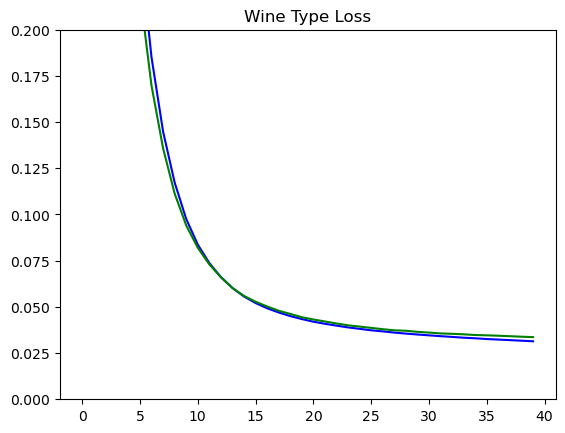

In [52]:
plot_metrics('wine_type_loss', 'Wine Type Loss', ylim=0.2)
#validation results in green

### Plots for Confusion Matrix

Plot the confusion matrices for wine type. You can see that the model performs well for prediction of wine type from the confusion matrix and the loss metrics.

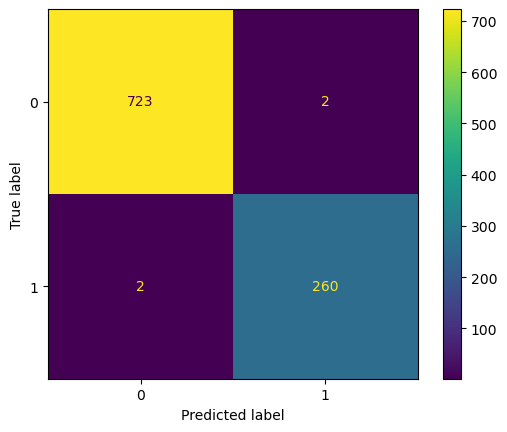

In [53]:
plot_confusion_matrix(test_Y[1], np.round(type_pred), title='Wine Type', labels = [0, 1])

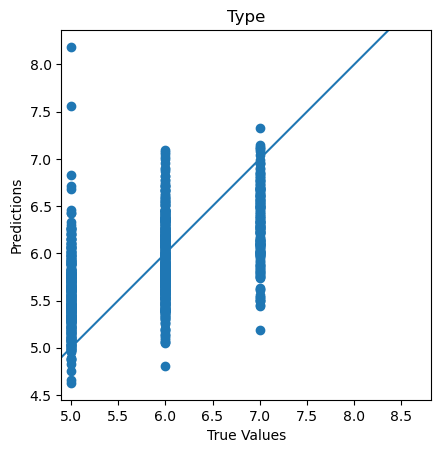

In [54]:
scatter_plot = plot_diff(test_Y[0], quality_pred, title='Type')